<a href="https://colab.research.google.com/github/sunnying25/new/blob/master/grain_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Grain boundary segmentation code
* paper : An automated methodology for grain segmentation and grain size

> 1. Edge Detection
*   canny edge detection


> 2. Closed Contour Formation
* joining of broken edges
: morphological closing operation of kernel size 3x3
* double edges of thick boundary : morphological dilation of kernel size 5x5 (which becomes thick boundary) → delete small black patches trapped inside the boundary regions (patch area < 0.1*mean black grain) → thinning algorithm
* removal of spurious edges : region growing algorithm







In [9]:
import cv2
import numpy as np

In [100]:
image = cv2.imread('/home/ms2.png',cv2.IMREAD_GRAYSCALE)

In [112]:
image=image[:256,:256]

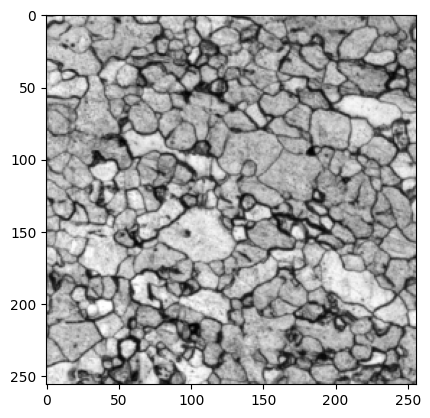

In [113]:
plt.imshow(image,cmap='gray')

In [194]:
# Gaussian 필터를 적용할 표준 편차를 설정합니다.
sigma = 1.4 # 원하는 표준 편차 값으로 수정하세요.

# 이미지를 Gaussian 필터로 smoothing합니다.
smoothed_image = cv2.GaussianBlur(image, (0, 0), sigma)

In [202]:
canny_edges = cv2.Canny(smoothed_image, threshold1=30, threshold2=150)

In [203]:
from matplotlib import pyplot as plt

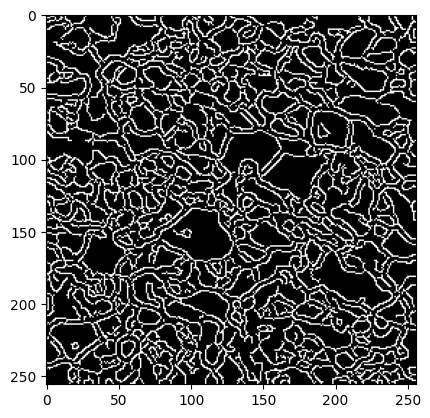

In [204]:
plt.imshow(canny_edges,cmap='gray')

In [205]:
kernel = np.ones((3,3),np.uint8)
close = cv2.morphologyEx(canny_edges, cv2.MORPH_CLOSE,kernel)

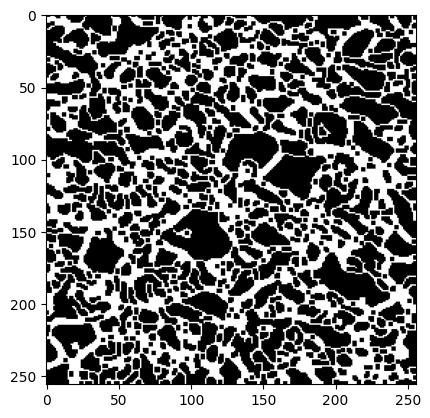

In [206]:
plt.imshow(close,cmap='gray')

In [207]:
kernel = np.ones((3,3),np.uint8)
dilate = cv2.dilate(close,kernel,iterations=1)

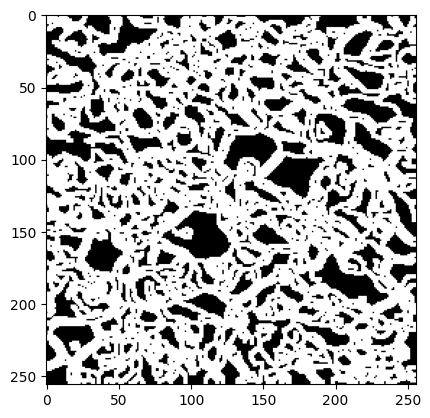

In [208]:
plt.imshow(dilate,cmap='gray')

In [209]:
dilate_reverse = 255-dilate

In [210]:
num_labels, labeled_image, stats, centroids = cv2.connectedComponentsWithStats(dilate_reverse, connectivity=8)

# 작은 검은 패치 식별 및 제거
area_threshold = 0.10 * np.mean(stats[:,4])  # 임계값 계산
for label in range(1, num_labels):  # 배경 (레이블 0)은 제외
    if stats[label, 4] < area_threshold:
        # 작은 검은 패치를 백색으로 채우거나 백색 경계로 표시
        dilate[labeled_image == label] = 255

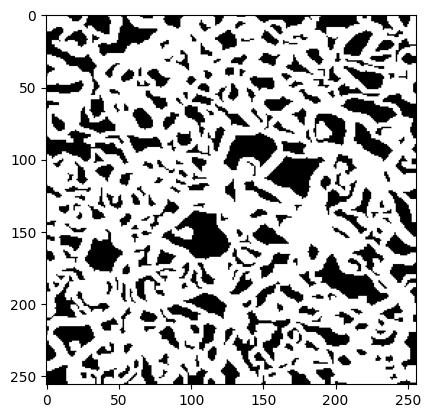

In [211]:
plt.imshow(dilate,cmap='gray')

In [212]:
import mahotas as mh

In [213]:
thinned_image = mh.thin(dilate)

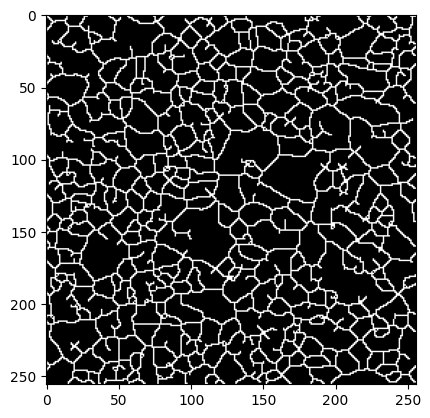

In [214]:
plt.imshow(thinned_image,cmap='gray')

In [217]:
from skimage import io, color, measure, segmentation

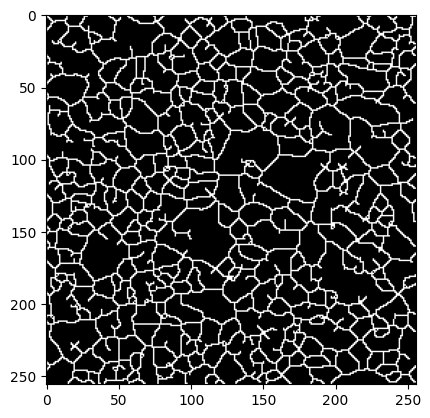

In [221]:
# grain boundary 중 연결되지 못한 것 제거 (0,0) : boundary
labels = segmentation.flood(thinned_image, (0,0)).astype(np.int8)

plt.imshow(labels,cmap='gray')

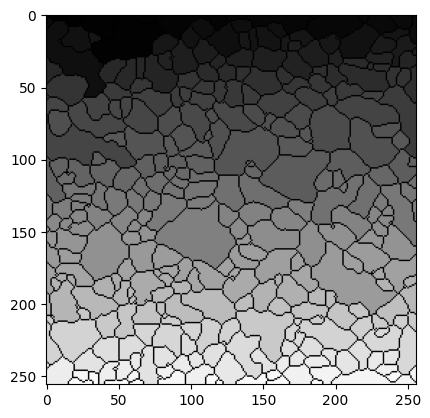

In [237]:
water=skimage.segmentation.watershed(labels, markers=None, connectivity=1, offset=None, mask=None, compactness=0, watershed_line=True)
plt.imshow(water,cmap='gray')


In [226]:
from PIL import Image
img1 = Image.fromarray(image)
img2 = Image.fromarray(labels*255)
combined_image = Image.blend(img1, img2, alpha=0.3)

ValueError: ignored

In [228]:
labels

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 1, 0, ..., 1, 1, 1],
       [0, 1, 1, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)